# Classifying Fashion-MNIST

Let's do it on Fashion-MNIST. This is after Part 3

<img src='assets/fashion-mnist-sprite.png' width=500px>

First off, let's load the dataset through torchvision.

In [2]:
import torch
from torchvision import datasets, transforms

import helper

In [29]:
#Define a transform to normalize the data

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, ))])

#Download and load training data

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


testloader = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size = 64, shuffle=True)

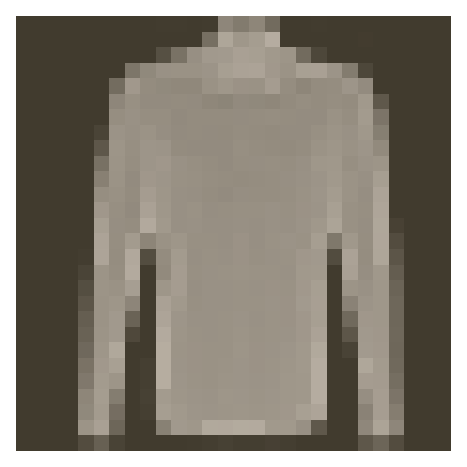

In [30]:
#See one of the images

image, label = next(iter(trainloader))
helper.imshow(image[5,:]);

In [31]:
image.shape

torch.Size([64, 1, 28, 28])

## Building a network

In [15]:
from torch import nn, optim
import torch.nn.functional as F

In [22]:
#Define you network architecture

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        #make sure the tensor is flattened
        
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

## Train the network

Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

In [23]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

In [24]:
#Training

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps,labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f"Training Loss: {running_loss/len(trainloader)}")

Training Loss: 0.5154476189918356
Training Loss: 0.38933232817441416
Training Loss: 0.35531055291832636
Training Loss: 0.3333830534140947
Training Loss: 0.3123565643930486


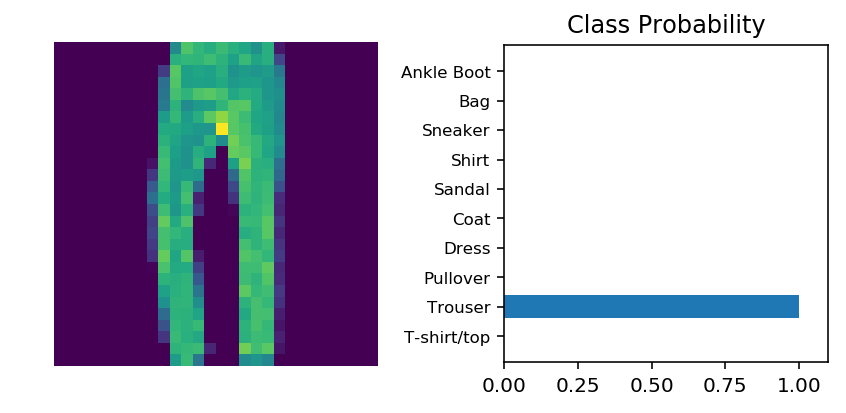

In [36]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

#Test on our network 

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

#Calculate the class probablities (softmax) for images

ps = torch.exp(model(img))

# Plot the images and probablities

helper.view_classify(img, ps, version='Fashion')